83
🔻SHORT Trade Entry: 126.89 | Timestamp: 2025-03-13 12:30:00+00:00  | Take Proft: 123.95942857142857 | Stop Loss: 129.51624285714286  |  PnL: $40.00  |  Equity: $1040.00 | Volume: 222537
🟢Trade closed: 2025-03-13 13:45:00+00:00 | Target hit: 2025-03-13 13:45:00+00:00 | Exit: 124.11 | TP: 123.95942857142857
116
⬆LONG Trade Entry: 121.4 | Timestamp: 2025-03-13 20:45:00+00:00  | Take Proft: 123.52457142857143 | Stop Loss: 119.49605714285714  |  PnL: $41.60  |  Equity: $1081.60 | Volume: 94959
🟢Trade closed: 2025-03-13 22:45:00+00:00 | Target hit: 2025-03-13 22:45:00+00:00 | Exit: 123.78 | TP: 123.52457142857143
220
🔻SHORT Trade Entry: 135.35 | Timestamp: 2025-03-14 22:45:00+00:00  | Take Proft: 133.06199999999998 | Stop Loss: 137.4004  |  PnL: $43.26  |  Equity: $1124.86 | Volume: 53000
🟢Trade closed: 2025-03-15 00:15:00+00:00 | Target hit: 2025-03-15 00:15:00+00:00 | Exit: 133.14 | TP: 133.06199999999998
258
⬆LONG Trade Entry: 132.58 | Timestamp: 2025-03-15 08:15:00+00:00  | Take Proft

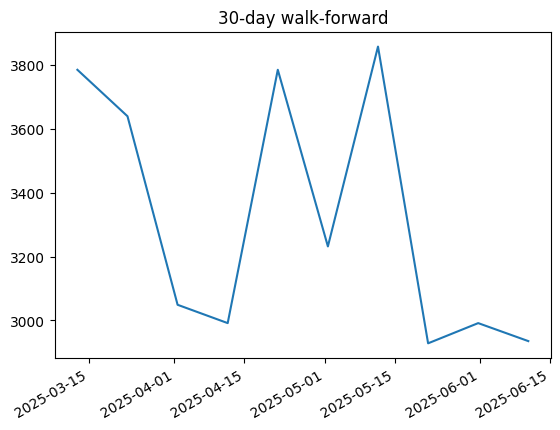

In [ ]:

import sys
import os

# Add parent directory to sys.path to resolve local imports
# __file__ is not defined in Jupyter, use current working directory instead
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import asyncio, pandas as pd
from data import preload_history
from backtest.backtest import backtest

async def main():
    hist = await preload_history(limit=12000)    # ~120 d
    equity_curve = []
    for start in pd.date_range(hist.index.min(), hist.index.max()-pd.Timedelta(days=30), freq='10D'):
        window = hist[(hist.index >= start) & (hist.index < start + pd.Timedelta(days=30))]
        stats   = backtest(window, equity0=1_000, risk_pct=0.02)
        equity_curve.append((start, stats['equity_final']))
    pd.Series(dict(equity_curve)).plot(title="30-day walk-forward")
# In Jupyter, just run the async main function directly
await main()